Файл успешно загружен
--- Данные загружены ---
         enrollee_id      city  city_development_index gender  \
count   19158.000000     19158            19158.000000  14650   
unique           NaN       123                     NaN      3   
top              NaN  city_103                     NaN   Male   
freq             NaN      4355                     NaN  13221   
mean    16875.358179       NaN                0.828848    NaN   
std      9616.292592       NaN                0.123362    NaN   
min         1.000000       NaN                0.448000    NaN   
25%      8554.250000       NaN                0.740000    NaN   
50%     16982.500000       NaN                0.903000    NaN   
75%     25169.750000       NaN                0.920000    NaN   
max     33380.000000       NaN                0.949000    NaN   

            relevent_experience enrolled_university education_level  \
count                     19158               18772           18698   
unique                        

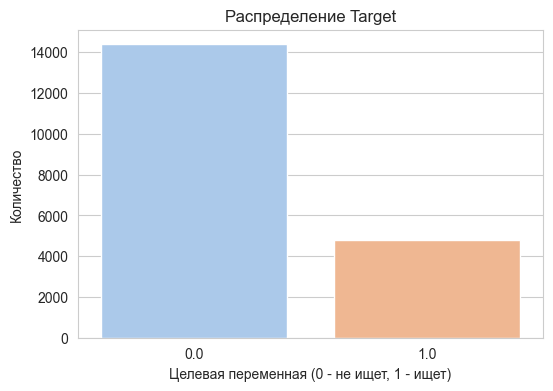

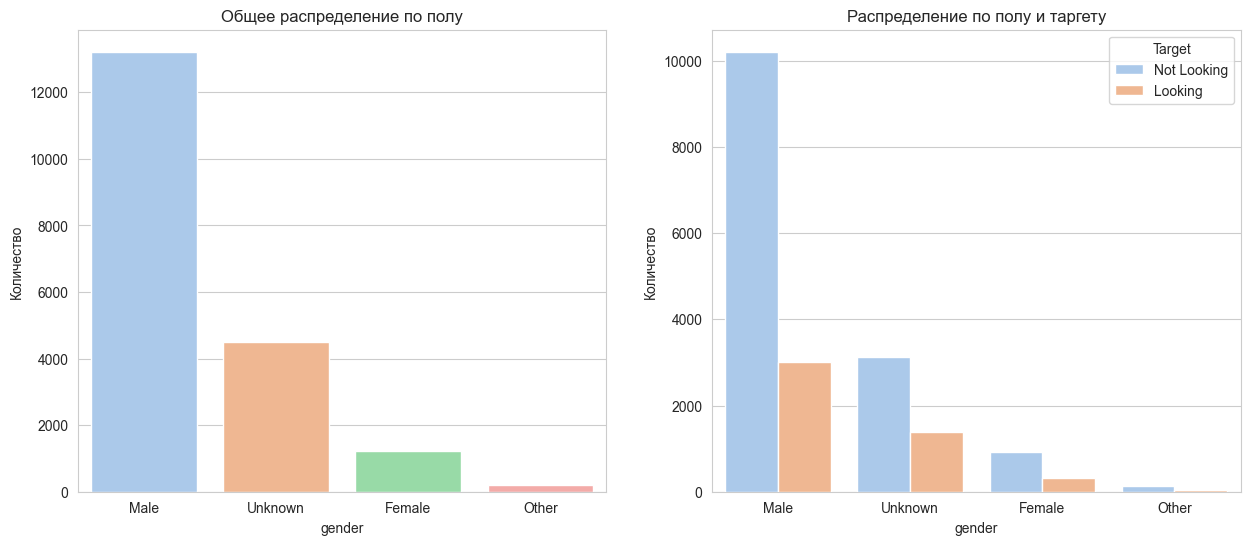

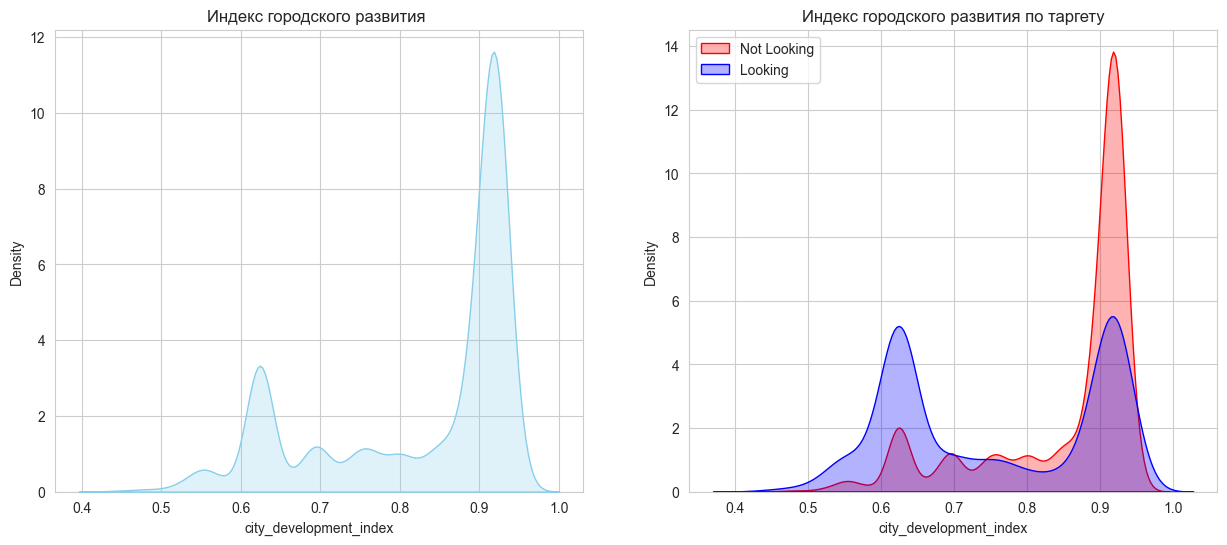

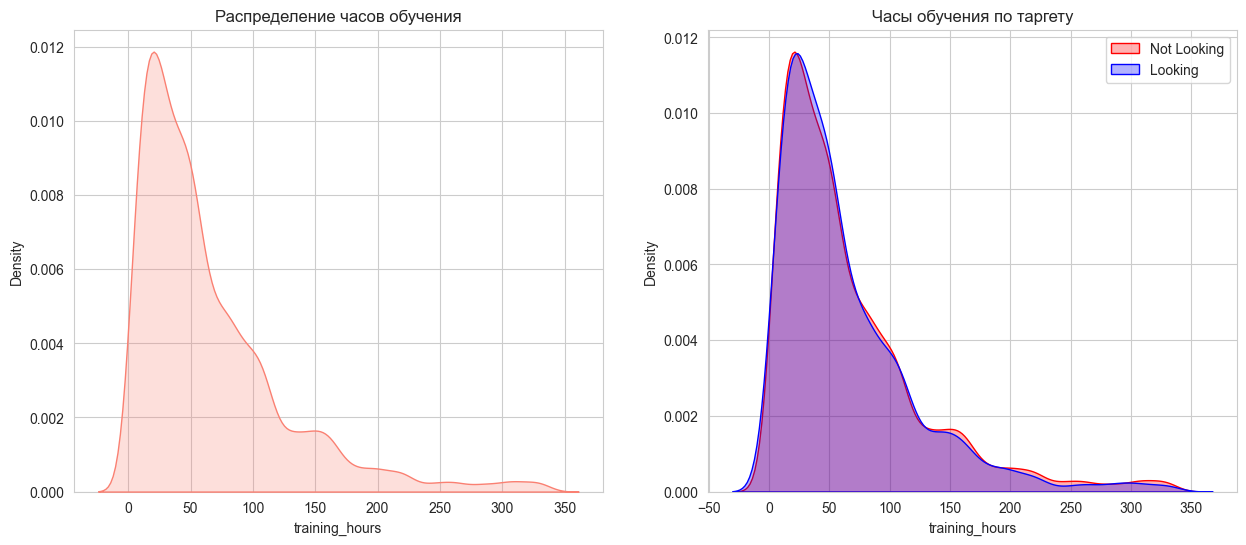

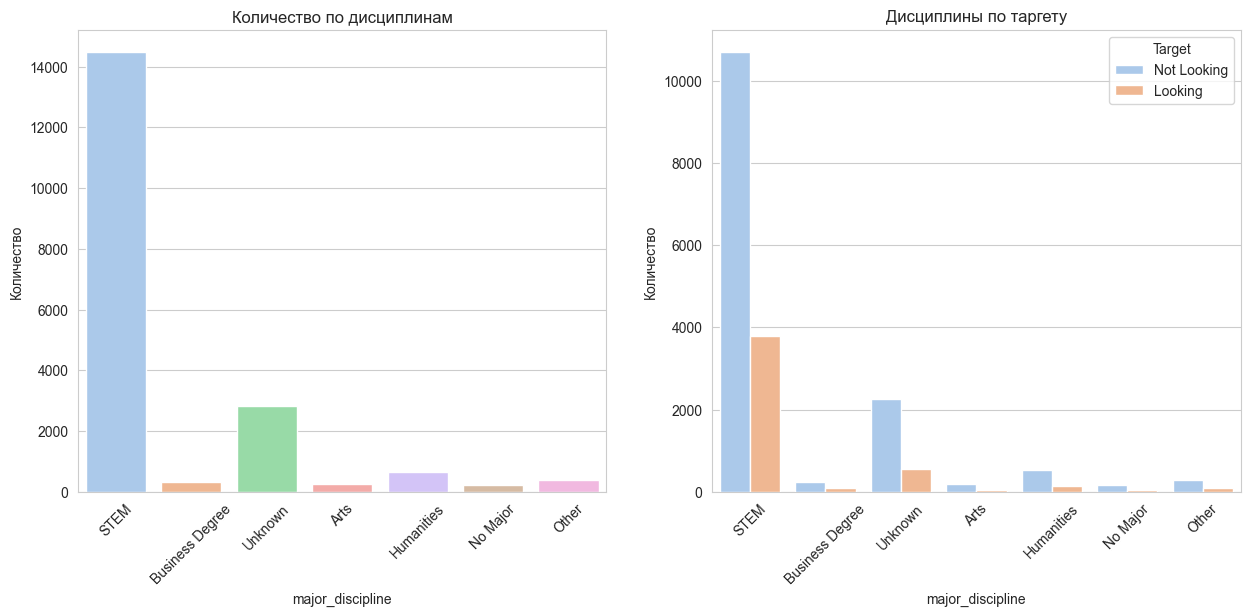

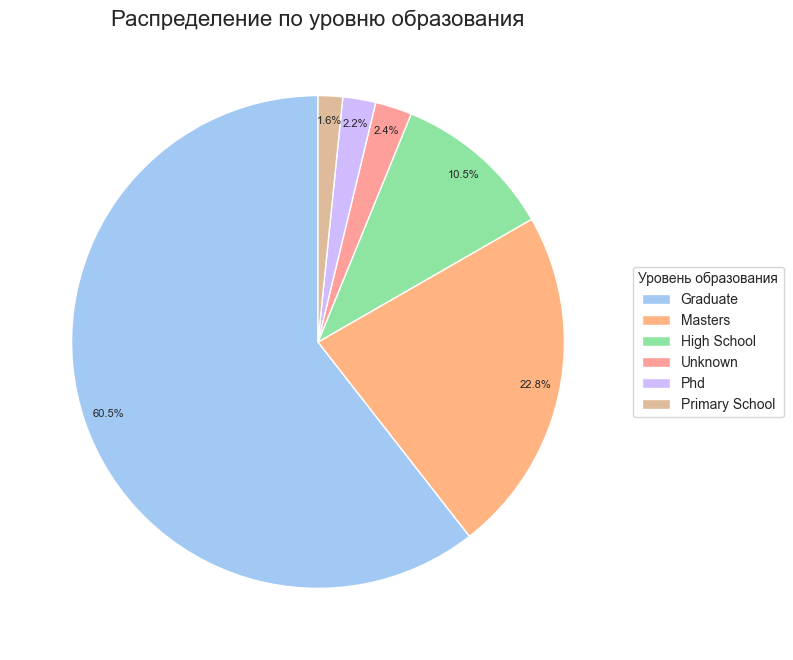

--- Визуализация завершена ---


In [1]:
#hw2_main.py
from data_loader import load_data_csv
from data_processor import data_discribe, data_fill_unkn
from visualizer import plot_target_balance, plot_gender_distribution, plot_city_development, plot_training_hours, plot_major_discipline, plot_education_level

df_train = load_data_csv('aug_train.csv')

if df_train is not None:
    print('--- Данные загружены ---')
    print(data_discribe(df_train))

    df_train_filled = data_fill_unkn(df_train)
    print("--- Пропуски заполнены ---")
    print(data_discribe(df_train_filled))

    print("--- Начинаем визуализацию ---")
    plot_target_balance(df_train_filled)
    plot_gender_distribution(df_train_filled)
    plot_city_development(df_train_filled)
    plot_training_hours(df_train_filled)
    plot_major_discipline(df_train_filled)
    plot_education_level(df_train_filled)
    print("--- Визуализация завершена ---")

In [ ]:
#data_loader.py
import pandas as pd
import os
import requests

#Loading .csv
def load_data_csv(path):
    if not os.path.exists(path):
        print(f'Файл не найден, путь {path} неверный.')
        return None
    try:
        print('Файл успешно загружен')
        return pd.read_csv(path)
    except Exception as e:
        print(f'Возникла ошибка {e} при загрузке файла')
        return None

#Loading .json
def load_data_json(path):
    if not path.os.exist(path):
        print(f'Файл не найден, путь {path} неверный.')
        return None
    try:
        print('Файл успешно загружен')
        return pd.read_json(path)
    except Exception as e:
        print(f'Возникла ошибка {e} при загрузке файла')
        return None

#Loading API
def load_data_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return pd.DataFrame(data)
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе к API: {e}")
        return None

In [1]:
#data_processor.py
import pandas as pd

#Describe data
def data_discribe(df):
    print(df.describe(include = "all"))
    print(df.shape)
    print(df.info())
    print(f'Missing data:\n{df.isnull().sum()}')
    print(df['target'].value_counts(normalize=True))
    print(f'Список столбцов с пропущенными значениями: {df.columns[df.isnull().any()].tolist()}')

#Filling missing data with mean
def data_fill_mean(df):
    df = df.copy()
    numeric_cols_nan = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()].tolist()
    for col in numeric_cols_nan:
        if col in df.columns:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    return df

#Filling missing data with median
def data_fill_median(df):
    df = df.copy()
    numeric_cols_nan = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()].tolist()
    for col in numeric_cols_nan:
        if col in df.columns:
            median = df[col].median()
            df[col] = df[col].fillna(median)
    return df

#Filling missing data with mode
def data_fill_freq(df):
    df = df.copy()
    list_cols_nan = df.columns[df.isnull().any()].tolist()
    for col in list_cols_nan:
        if col in df.columns:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
    return df

#Filling missing with 'Unknown'
def data_fill_unkn(df):
    df = df.copy()
    list_cols_nan = df.columns[df.isnull().any()].tolist()
    for col in list_cols_nan:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown')
    return df

In [ ]:
#visualizer.py
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def plot_target_balance(df):
    print("\n--- Проверяем баланс Target ---")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', hue='target', data=df, palette='pastel', legend=False)
    plt.title('Распределение Target')
    plt.xlabel('Целевая переменная (0 - не ищет, 1 - ищет)')
    plt.ylabel('Количество')
    plt.show()

def plot_gender_distribution(df):
    fig = plt.figure(figsize=(15,6))

    ax0 = fig.add_subplot(1, 2, 1)
    sns.countplot(x="gender", hue="gender", data=df, ax=ax0, palette='pastel', legend=False)
    ax0.set_title("Общее распределение по полу")
    ax0.set_ylabel("Количество")

    ax1 = fig.add_subplot(1, 2, 2)
    sns.countplot(x="gender", hue="target", data=df, ax=ax1, palette='pastel', zorder=3)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles, ["Not Looking", "Looking"], title="Target")
    ax1.set_title("Распределение по полу и таргету")
    ax1.set_ylabel("Количество")

    plt.show()

def plot_city_development(df):
    fig = plt.figure(figsize=(15, 6))
    
    ax0 = fig.add_subplot(1, 2, 1)
    sns.kdeplot(df["city_development_index"], ax=ax0, fill=True, color='skyblue', zorder=3)
    ax0.set_title("Индекс городского развития ")

    ax1 = fig.add_subplot(1, 2, 2)
    sns.kdeplot(df.loc[(df["target"]==0), "city_development_index"], ax=ax1, label="Not Looking", fill=True, color='red', alpha=0.3)
    sns.kdeplot(df.loc[(df["target"]==1), "city_development_index"], ax=ax1, label="Looking", fill=True, color='blue', alpha=0.3)
    ax1.set_title("Индекс городского развития по таргету")
    ax1.legend()

    plt.show()

def plot_training_hours(df):
    fig = plt.figure(figsize=(15, 6))
    
    ax0 = fig.add_subplot(1, 2, 1)
    sns.kdeplot(df["training_hours"], ax=ax0, fill=True, color='salmon', zorder=3)
    ax0.set_title("Распределение часов обучения")

    ax1 = fig.add_subplot(1, 2, 2)
    sns.kdeplot(df.loc[(df["target"]==0), "training_hours"], ax=ax1, label="Not Looking", fill=True, color='red', alpha=0.3)
    sns.kdeplot(df.loc[(df["target"]==1), "training_hours"], ax=ax1, label="Looking", fill=True, color='blue', alpha=0.3)
    ax1.set_title("Часы обучения по таргету")
    ax1.legend()
    
    plt.show()

def plot_major_discipline(df):
    fig = plt.figure(figsize=(15, 6))
    
    ax0 = fig.add_subplot(1, 2, 1)
    sns.countplot(x=df["major_discipline"], hue="major_discipline", data=df, ax=ax0, palette='pastel', legend=False)
    ax0.tick_params(axis='x', rotation=45)
    ax0.set_title("Количество по дисциплинам")
    ax0.set_ylabel("Количество")
    
    ax1 = fig.add_subplot(1, 2, 2)
    sns.countplot(x="major_discipline", hue="target", data=df, ax=ax1, palette='pastel', zorder=3)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles, ["Not Looking", "Looking"], title="Target")
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title("Дисциплины по таргету")
    ax1.set_ylabel("Количество")
    
    plt.show()

def plot_education_level(df):
    plt.figure(figsize=(10, 8))
    counts = df['education_level'].value_counts()
    plt.pie(counts, 
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('pastel'),
            pctdistance=0.9,
            textprops={'fontsize': 8})
    plt.legend(counts.index, 
               title="Уровень образования",
               loc="center left", 
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('Распределение по уровню образования', fontsize=16)           
    plt.show()